In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
print(np.shape(fish_length))
print(np.shape(fish_weight))

(49,)
(49,)


In [6]:
fish_data = np.column_stack((fish_length, fish_weight))
#fish_target = [1]*35 + [0]*14

print(np.shape(fish_data))

np.ones(35)
np.zeros(14)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

fish_data[:5]

(49, 2)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#train_test_split(
#    *arrays,
#    test_size=None,
#    train_size=None,
#    random_state=None,
#    shuffle=True,
#    stratify=None,
# )

train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, stratify = fish_target, random_state = 42)

In [14]:
print(np.shape(fish_data))
print(np.shape(train_input))
print(np.shape(test_input))

print(test_target)

(49, 2)
(36, 2)
(13, 2)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# knn
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [17]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [19]:
kn.predict([[25, 150]])

array([0.])

In [22]:
distances, inds = kn.kneighbors([[25, 150]])

print(distances)
print(inds)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


<function matplotlib.pyplot.show(close=None, block=None)>

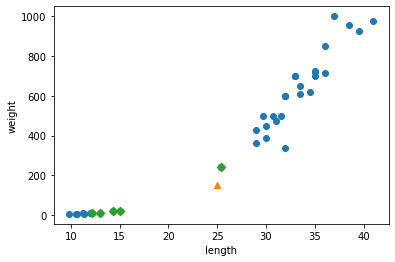

In [28]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[inds, 0], train_input[inds, 1], marker = 'D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show

In [25]:
train_input[inds]
train_target[inds]

array([[1., 0., 0., 0., 0.]])

In [31]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean.round(2))
print(std.round(2))




[ 27.3 454.1]
[  9.98 323.3 ]


array([0.36569445, 0.71195974])

In [33]:
# 표준화
train_scaled = (train_input - mean) / std
train_scaled[:5].round(2)

array([[ 0.24,  0.14],
       [-1.51, -1.37],
       [ 0.57,  0.76],
       [-1.6 , -1.38],
       [ 1.22,  1.46]])

In [34]:
new = ([25, 150] - mean) / std
print(new)

[-0.23012627 -0.94060693]


<function matplotlib.pyplot.show(close=None, block=None)>

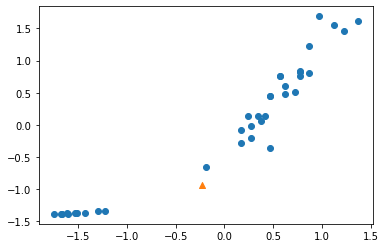

In [35]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(-0.23, -0.94, marker = '^')

plt.show

In [36]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [41]:
#mean_t = np.mean(test_input, axis = 0)
#std_t = np.std(test_input, axis = 0)

test_scaled = (test_input - mean)/std

In [42]:
kn.score(test_scaled, test_target)

1.0

In [43]:
kn.predict([new])

array([1.])

In [44]:
dist, indx = kn.kneighbors([new])
print(inds)

[[21 33 19 30  1]]


<function matplotlib.pyplot.show(close=None, block=None)>

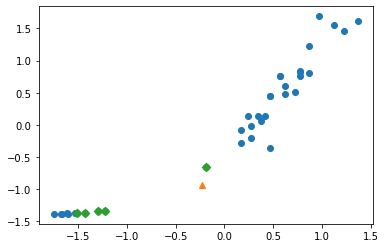

In [48]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[inds, 0], train_scaled[inds, 1], marker = "D")

plt.show